In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b>About Dataset</b>

<br>
Context
<br>
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service
<br>

Content
<br>

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

Complain - 1 if customer complained in the last 2 years <br>

DtCustomer - date of customer’s enrolment with the company<br>

Education - customer’s level of education <br>

Marital - customer’s marital status<br>

Kidhome - number of small children in customer’s household <br>

 Teenhome - number of teenagers in customer’s household<br>

 Income - customer’s yearly household income<br>

MntFishProducts - amount spent on fish products in the last 2 years<br>

MntMeatProducts - amount spent on meat products in the last 2 years<br>

MntFruits - amount spent on fruits products in the last 2 years<br>

MntSweetProducts - amount spent on sweet products in the last 2 years<br>

MntWines - amount spent on wine products in the last 2 years<br>

MntGoldProds - amount spent on gold products in the last 2 years<br>

NumDealsPurchases - number of purchases made with discount<br>

NumCatalogPurchases - number of purchases made using catalogue<br>

NumStorePurchases - number of purchases made directly in stores<br>

NumWebPurchases - number of purchases made through company’s web site<br>

NumWebVisitsMonth - number of visits to company’s web site in the last month<br>

Recency - number of days since the last purchase<br>

Z_CostContact - Cost to contact a customer<br>

Z_Revenue - Revenue after client accepting campaign
    
<br>
<b>Acknowledgements</b>
<br>

O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.
<br>

<b>Inspiration<b>
<br>

The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

In [2]:
df = pd.read_csv('marketing_campaigns.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
#Converting the date column to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Exploratory Data Analysis

In [9]:
df['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [10]:
df['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
df['Z_Revenue'].unique()

array([11], dtype=int64)

<b>Customer Demographics</b>
<br>

Performing EDA,Segmentation, relationships and analysis on demographics based on the variables to understand how different customer groups respond to marketing campaigns.

In [12]:
# Analyzing Education
# education_counts = df['Education'].value_counts()
# education_counts.plot(kind='bar', figsize=(8, 6))
# plt.title('Distribution of Education')
# plt.xlabel('Education Level')
# plt.ylabel('Count')
# plt.show()

<Axes: ylabel='Education'>

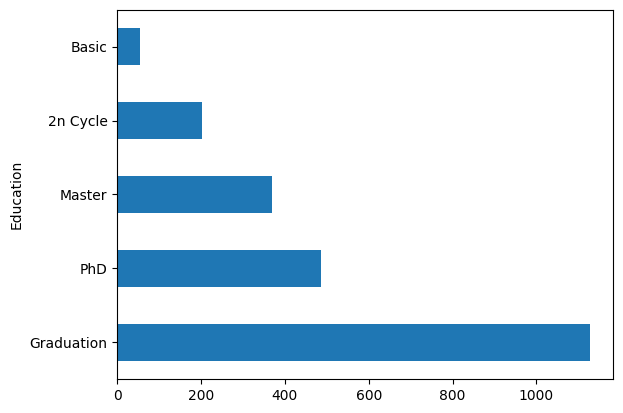

In [13]:
#Analyzing Education
df['Education'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Marital_Status'>

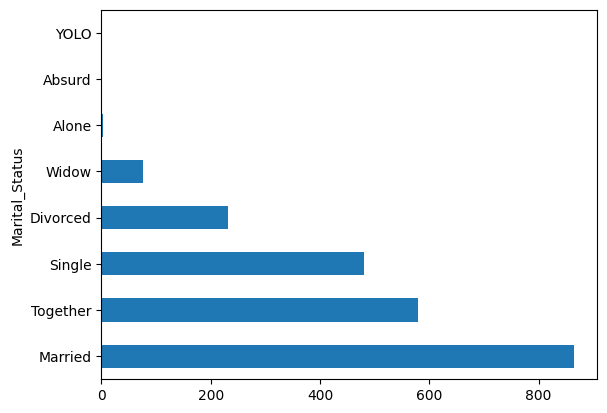

In [14]:
#Analyzing Marital Status
df['Marital_Status'].value_counts().plot(kind = 'barh')

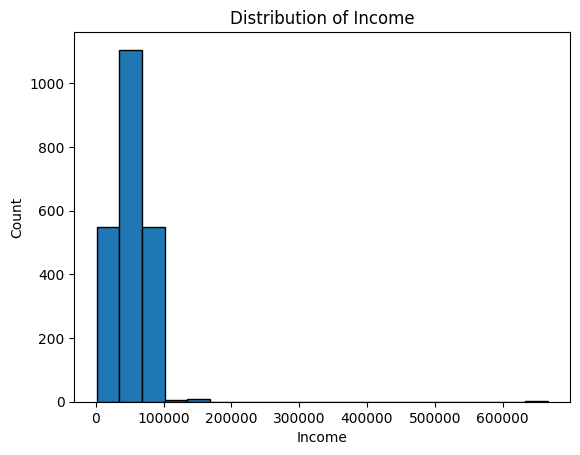

In [15]:
# Analyzing Income
plt.hist(df['Income'], bins=20, edgecolor='k')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

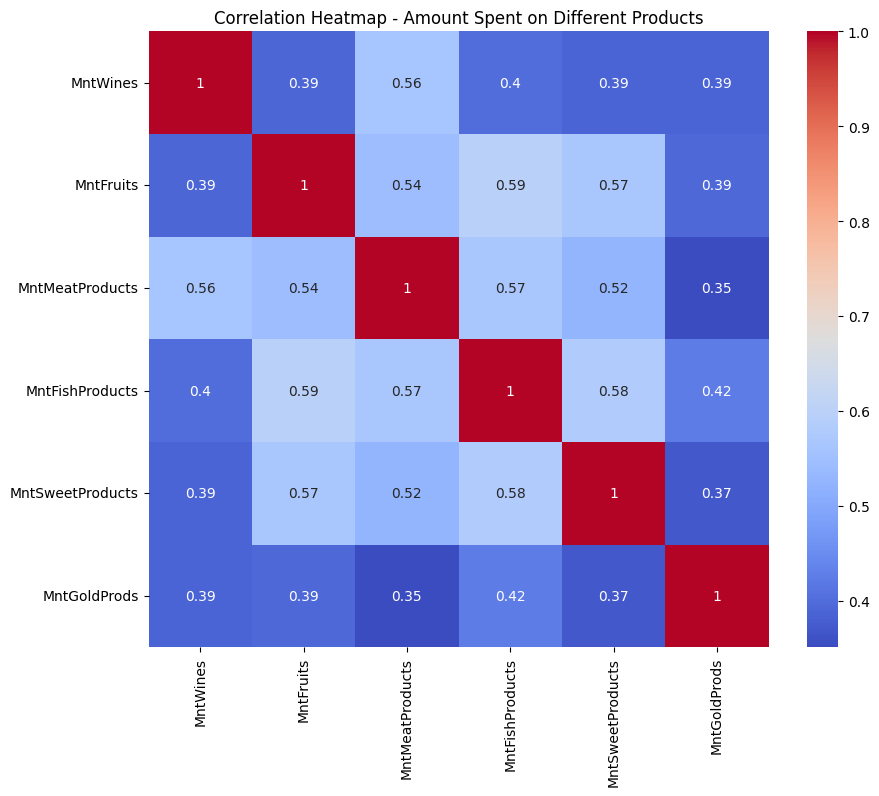

In [16]:
# Select the columns for the different products' spending amounts
columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a correlation matrix for the selected columns
correlation_matrix = df[columns].corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Heatmap - Amount Spent on Different Products')

# Show the heatmap
plt.show()

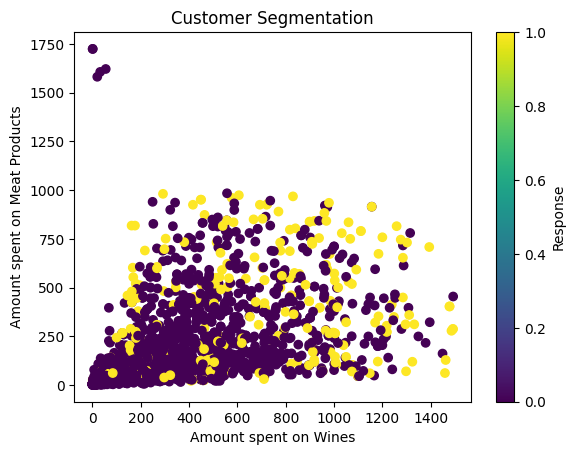

In [17]:
# Analyzing Customer Segmentation
plt.scatter(df['MntWines'], df['MntMeatProducts'], c=df['Response'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Amount spent on Wines')
plt.ylabel('Amount spent on Meat Products')
plt.colorbar(label='Response')
plt.show()

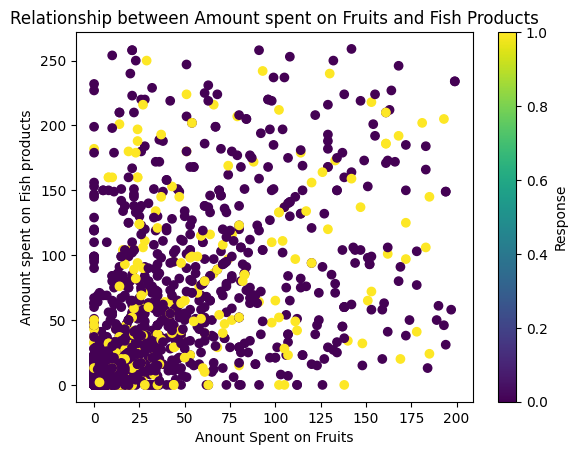

In [18]:
plt.scatter(df['MntFruits'], df['MntFishProducts'], c=df['Response'], cmap='viridis')
plt.title('Relationship between Amount spent on Fruits and Fish Products')
plt.xlabel('Anount Spent on Fruits')
plt.ylabel('Amount spent on Fish products')
plt.colorbar(label='Response')
plt.show()

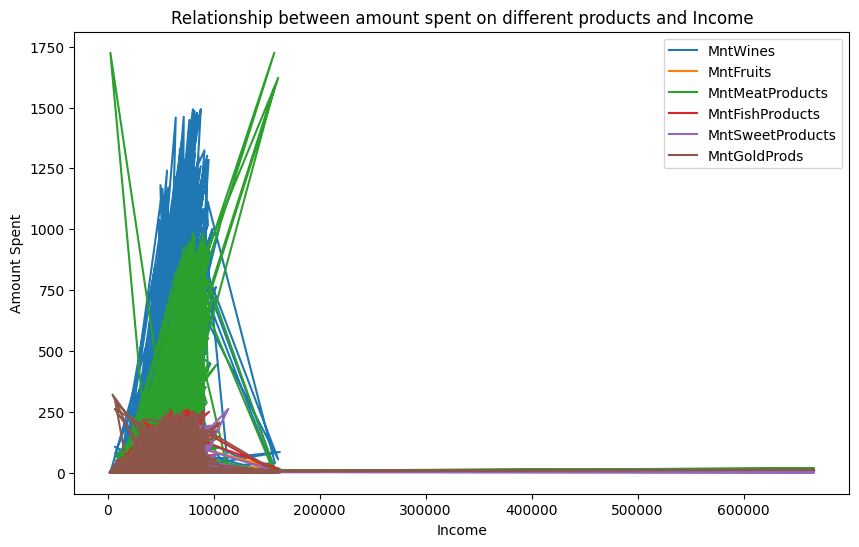

In [19]:
# Select the columns for income and spending on different products
columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot a line for each product's spending against income
for column in columns[1:]:
    plt.plot(df['Income'], df[column], label=column)

# Set the plot title and labels
plt.title('Relationship between amount spent on different products and Income')
plt.xlabel('Income')
plt.ylabel('Amount Spent')
plt.legend()

# Show the line plot
plt.show()

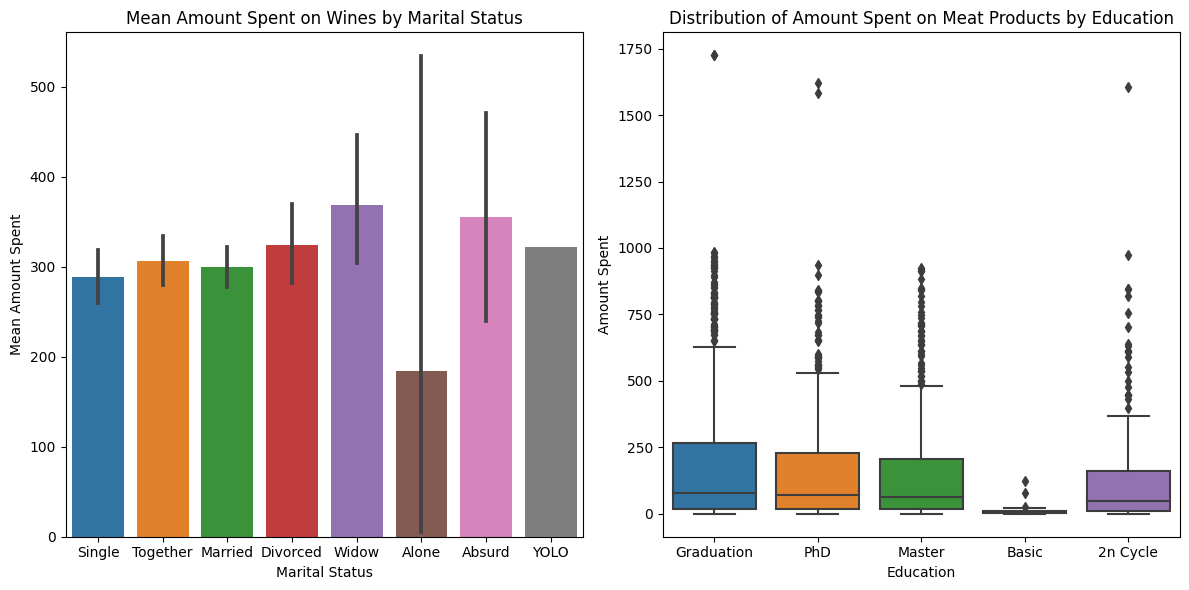

In [20]:
columns = ['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Set the figure size
plt.figure(figsize=(12, 6))

# Bar plot showing the mean amount spent on products by marital status
plt.subplot(1, 2, 1)
sns.barplot(x='Marital_Status', y='MntWines', data=df)
plt.title('Mean Amount Spent on Wines by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Amount Spent')

# Box plot showing the distribution of amount spent on products by education
plt.subplot(1, 2, 2)
sns.boxplot(x='Education', y='MntMeatProducts', data=df)
plt.title('Distribution of Amount Spent on Meat Products by Education')
plt.xlabel('Education')
plt.ylabel('Amount Spent')


# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

<b>Campaign Success</b>

In [21]:
# Calculate the number of customers who responded to each campaign
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
responses = df[campaign_columns].sum()

In [22]:
responses

AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
dtype: int64

In [23]:
# Calculate the percentage of acceptance for each campaign
total_responses = responses.sum()
acceptance_percentages = ((responses / total_responses) * 100).round(2)

In [24]:
acceptance_percentages

AcceptedCmp1    21.59
AcceptedCmp2     4.50
AcceptedCmp3    24.44
AcceptedCmp4    25.04
AcceptedCmp5    24.44
dtype: float64

<Axes: >

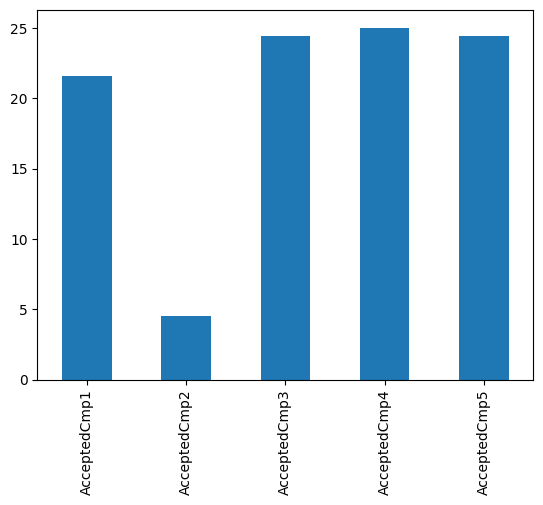

In [25]:
acceptance_percentages.plot(kind = 'bar')

Campaign 4 was the most successful campaign

<b>Customer complaints</b>

In [26]:
df['Complain'].unique()

array([0, 1], dtype=int64)

In [27]:
df['Complain'].value_counts(normalize = True)

Complain
0    0.990625
1    0.009375
Name: proportion, dtype: float64

In [28]:
# Calculate the complaint rate
total_customers = len(df)
total_complaints = df['Complain'].sum()
complaint_rate = (total_complaints / total_customers) * 100

In [29]:
complaint_rate

0.9375

99% of the customers did not complain

<b>Identifying potential issues affecting customer satisfaction</b>

Relationship between Marital Status and Education of complainants

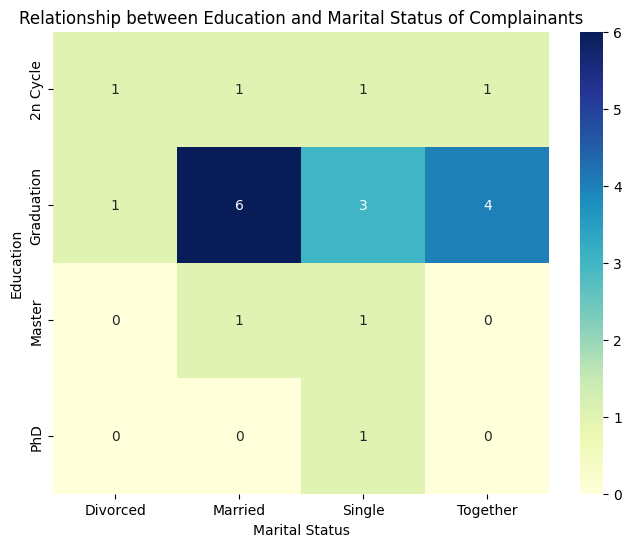

In [30]:
# Filter the dataframe for complainants
complainants = df[df['Complain'] == 1]

# Create a cross-tabulation of education and marital status
cross_tab = pd.crosstab(complainants['Education'], complainants['Marital_Status'])

# Plot a heatmap to visualize the relationship
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title('Relationship between Education and Marital Status of Complainants')
plt.xlabel('Marital Status')
plt.ylabel('Education')
plt.show()

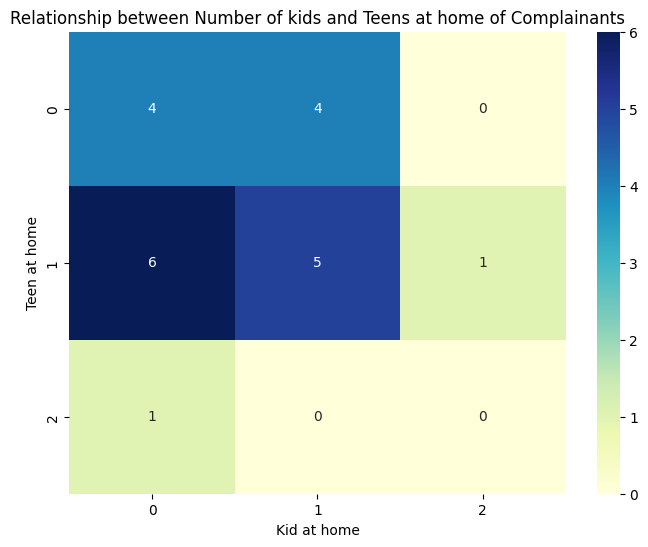

In [31]:
# Filter the dataframe for complainants
complainants = df[df['Complain'] == 1]

# Create a cross-tabulation of education and marital status
cross_tab = pd.crosstab(complainants['Kidhome'], complainants['Teenhome'])

# Plot a heatmap to visualize the relationship
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title('Relationship between Number of kids and Teens at home of Complainants')
plt.xlabel('Kid at home')
plt.ylabel('Teen at home')
plt.show()

In [32]:
complaint_issues = df[df['Complain'] == 1]['Education'].value_counts()
print("Complaint Issues by Education Level:")
print(complaint_issues)

Complaint Issues by Education Level:
Education
Graduation    14
2n Cycle       4
Master         2
PhD            1
Name: count, dtype: int64


In [33]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [34]:
complaint_issues = df[df['Complain'] == 1]['Marital_Status'].value_counts()
print("Complaint Issues by Marital status:")
print(complaint_issues)

Complaint Issues by Marital status:
Marital_Status
Married     8
Single      6
Together    5
Divorced    2
Name: count, dtype: int64


In [35]:
# Segment complaints by education and marital status
complaints_segmented = df[df['Complain'] == 1].groupby(['Education', 'Marital_Status']).size()

# Find the group with the most complaints
most_complaining_group = complaints_segmented.idxmax()

# Print the results
print("Segmentation of Complaints by Education and Marital Status:")
print(complaints_segmented)
print("\nGroup with the Most Complaints:")
print(most_complaining_group)

Segmentation of Complaints by Education and Marital Status:
Education   Marital_Status
2n Cycle    Divorced          1
            Married           1
            Single            1
            Together          1
Graduation  Divorced          1
            Married           6
            Single            3
            Together          4
Master      Married           1
            Single            1
PhD         Single            1
dtype: int64

Group with the Most Complaints:
('Graduation', 'Married')


<b>Purchase Channels</b>

In [36]:
# Calculate the total number of purchases for each channel
channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
purchase_counts = df[channels].sum()
purchase_counts

NumDealsPurchases       5208
NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
dtype: int64

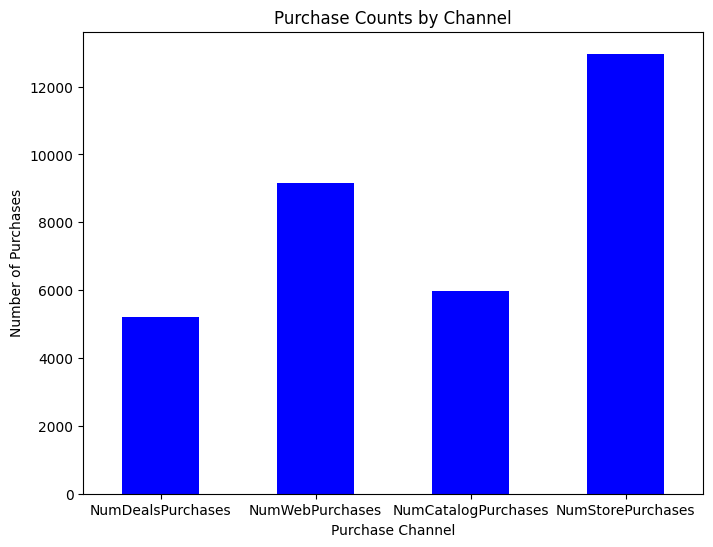

In [37]:
# Plot the purchase counts for each channel
plt.figure(figsize=(8, 6))
purchase_counts.plot(kind='bar', color='blue')
plt.title('Purchase Counts by Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.show()

Store Purchases and Website purchases lead the race

<b>Customer purchasing patterns<b>

In [38]:
# Calculate the total amount spent on each product category
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = df[product_categories].sum()
total_spending

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

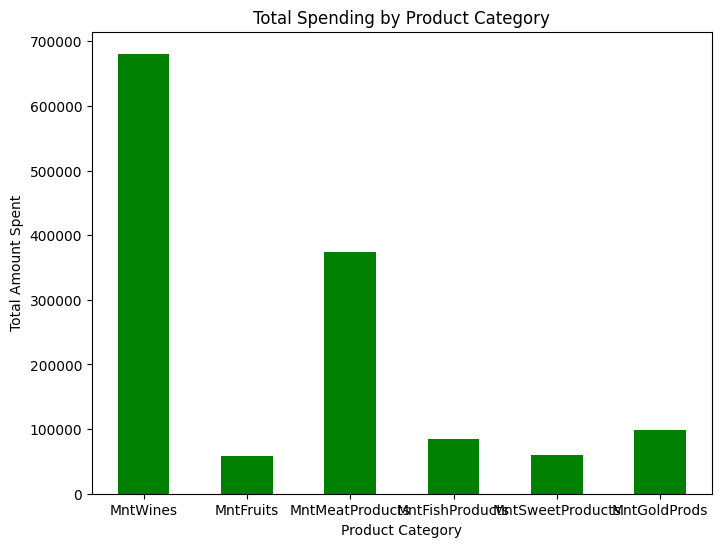

In [39]:
# Plot the total spending for each product category
plt.figure(figsize=(8, 6))
total_spending.plot(kind='bar', color='green')
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=0)
plt.show()

Customers have spent more on Wines and Meat products 

<b>Recency</b>
<br>

Identifying customers who may be more engaged or in need of re-engagement.

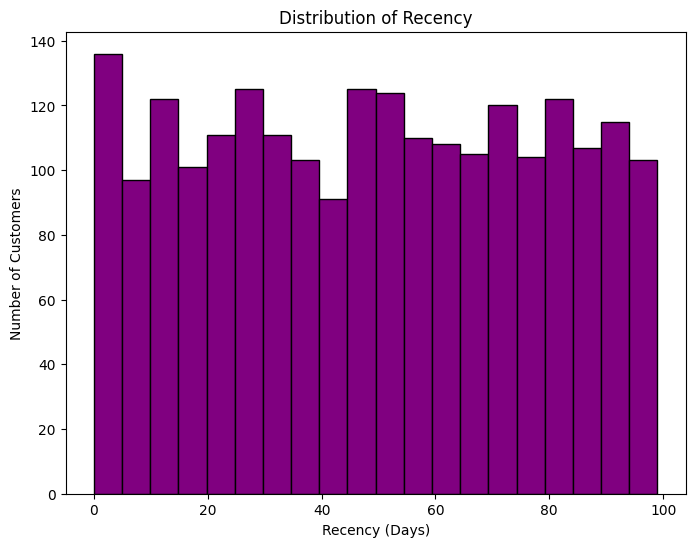

In [40]:
# Plot the distribution of recency
plt.figure(figsize=(8, 6))
plt.hist(df['Recency'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.show()

By identifying customers with higher recency values that is to say greater than 49, we can design targeted campaigns to reactivate or retain them.

In [41]:
# Calculate the mean recency
mean_recency = df['Recency'].mean()

# Identify customers with higher recency values
high_recency_customers = df[df['Recency'] > mean_recency]
customers = high_recency_customers[['ID','Recency']]
customers.head()

,ID,Recency
0,5524,58
4,5324,94
9,5899,68
11,387,59
12,2125,82
